<a href="https://colab.research.google.com/github/2303a52163/SML_2303a52163/blob/main/SML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 **SML ASSIGNMENT-6**


   
   **Course Name:        Statistical Machine Learning**  

   **Resources:          Google Colab**

   **Name:               U.Maheesh Varma**

   **RollNo:             2303A52163**

   **Batch:              34**

**Question 1:**

**Imagine you are developing a simple machine learning model to predict whether a student will pass a course based on the following five features:**

**1.Study Hours per Week: Number of hours the student studies per week.**

**2.Class Attendance (%): Percentage of classes attended by the student.**

**3.Previous Exam Score (%): Score in the previous exam.**

**4.Participation in Group Study: Whether the student participates in group study sessions (1 for Yes, 0 for No).**

**5.Submission of Assignments (%): Percentage of assignments submitted by the student.**

**Dataset:**

**Below is an example dataset with 10 students (rows), 5 features, and a binary target label (Pass/Fail). The target label is 1 if the student is predicted to pass, and 0 if they are predicted to fail.**

**Study Hours per Week: [10, 5, 15, 2, 12, 8, 14, 3, 11, 6]**

**Class Attendance (%): [90, 60, 95, 30, 85, 75, 92, 50, 88, 65]**

**Previous Exam Score (%): [85, 70, 90, 50, 88, 65, 93, 55, 80, 60]**

**Participation in Group Study: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]**

**Submission of Assignments (%): [100, 80, 100, 40, 90, 70, 95, 60, 85, 75]**

**Pass/Fail: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]**



   Study Hours per Week  Class Attendance (%)  Previous Exam Score (%)  \
0                    10                    90                       85   
1                     5                    60                       70   
2                    15                    95                       90   
3                     2                    30                       50   
4                    12                    85                       88   

   Participation in Group Study  Submission of Assignments (%)  Pass/Fail  
0                             1                            100          1  
1                             0                             80          0  
2                             1                            100          1  
3                             0                             40          0  
4                             1                             90          1  
Participation in Group Study
1    5
0    5
Name: count, dtype: int64
Pass/Fail
1    5
0    5
Name: 

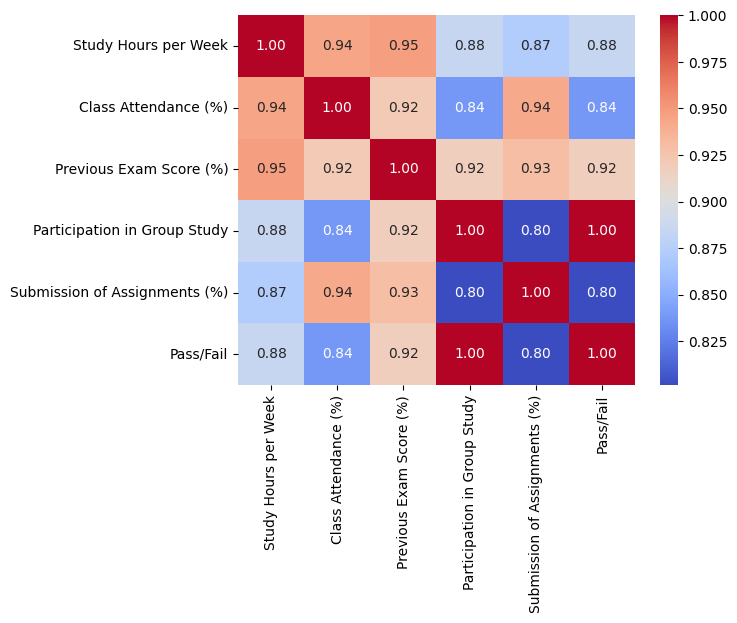

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
import pandas as pd
data = pd.DataFrame({
    'Study Hours per Week': [10, 5, 15, 2, 12, 8, 14, 3, 11, 6],
    'Class Attendance (%)': [90, 60, 95, 30, 85, 75, 92, 50, 88, 65],
    'Previous Exam Score (%)': [85, 70, 90, 50, 88, 65, 93, 55, 80, 60],
    'Participation in Group Study': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Submission of Assignments (%)': [100, 80, 100, 40, 90, 70, 95, 60, 85, 75],
    'Pass/Fail': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})
print(data.head())
print(data['Participation in Group Study'].value_counts())
print(data['Pass/Fail'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
df = pd.DataFrame(data)

X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


**Question 2:**

**Implement a perceptron learning model to train above data, and find the accuracy.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/diabetes_data_upload.csv')
print(df.isnull().sum())
X = df.drop(columns=['class'])
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_scaled, y_train)


y_pred = perceptron.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {accuracy * 100:.2f}%')

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
Perceptron Model Accuracy: 88.46%
